In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im
from sklearn.cluster import KMeans
#from PIL import Image

In [3]:
path1 = "CESMU200/CESM_csvfile"
path2 = "CESMZ200/CESM_csvfile"

In [7]:
arr_pressure.min()

10841

In [24]:
a = pd.read_csv("CESMZ200/CESM_csvfile/day1.csv", header = None)
b = pd.read_csv("CESMU200/CESM_csvfile/day1.csv", header = None)
b.shape
print(sum(b<0)/b.shape[0]/b.shape[1])

0.7567567567567568


[[0.95746032 0.95428571 0.94984127 ... 0.9631746  0.96190476 0.96063492]
 [0.95174603 0.94793651 0.94349206 ... 0.96063492 0.95936508 0.95809524]
 [0.94666667 0.94222222 0.9384127  ... 0.9568254  0.95492063 0.95365079]
 ...
 [0.04190476 0.03936508 0.03746032 ... 0.12825397 0.12634921 0.12444444]
 [0.03238095 0.03047619 0.02793651 ... 0.11809524 0.11619048 0.11492063]
 [0.0215873  0.01968254 0.01777778 ... 0.10730159 0.10666667 0.1047619 ]]


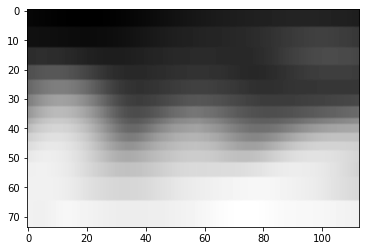

In [14]:
a = pd.read_csv("CESMZ200/CESM_csvfile/day1.csv", header = None)
    
arr_pressure = a.values
    
numberofcluster = (arr_pressure.max() - arr_pressure.min())//100

arr_pressure = (arr_pressure-arr_pressure.min())/(arr_pressure.max()-arr_pressure.min())

print(arr_pressure)
    
kmeans = KMeans(n_clusters =numberofcluster).fit(arr_pressure)
    
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(74,113)
    
filped_img = np.flip(segmented_img,0)
plt.imshow(filped_img, cmap = 'gray')

[[0.95746032 0.45054945]
 [0.95428571 0.46153846]
 [0.94984127 0.48351648]
 ...
 [0.10730159 0.30769231]
 [0.10666667 0.30769231]
 [0.1047619  0.30769231]]


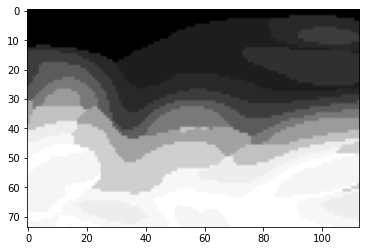

In [10]:
a = pd.read_csv("CESMU200/CESM_csvfile/day1.csv", header = None)
b = pd.read_csv("CESMZ200/CESM_csvfile/day1.csv", header = None)
    
arr_pressure = b.values
arr_wind = a.values
    
numberofcluster = (arr_pressure.max() - arr_pressure.min())//100

arr_pressure = (arr_pressure-arr_pressure.min())/(arr_pressure.max()-arr_pressure.min())
arr_wind = (arr_wind-arr_wind.min())/(arr_wind.max()-arr_wind.min())

train_pressure = arr_pressure.reshape(-1,1)
train_wind = arr_wind.reshape(-1,1)
train = np.concatenate((train_pressure,train_wind),axis=1)
print(train)
    
kmeans = KMeans(n_clusters =numberofcluster).fit(train)
    
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(74,113,2)
pressure_img = segmented_img[:,:,0]
    
filped_img = np.flip(pressure_img,0)
plt.imshow(filped_img, cmap = 'gray')

In [27]:
for i in range(1,366):
    a = pd.read_csv("CESMU200/CESM_csvfile/day" + str(i) + '.csv', header = None)
    b = pd.read_csv("CESMZ200/CESM_csvfile/day" + str(i) + '.csv', header = None)
    
    arr_pressure = b.values
    arr_wind = a.values
    
    numberofcluster = (arr_pressure.max() - arr_pressure.min())//100
    
    train_pressure = arr_pressure.reshape(-1,1)
    train_wind = arr_wind.reshape(-1,1)
    train = np.concatenate((train_pressure,train_wind),axis=1)
    
    kmeans = KMeans(n_clusters =numberofcluster).fit(train)
    
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(74,113,2)
    pressure_img = segmented_img[:,:,0]
    
    filped_img = np.flip(pressure_img,0)
    plt.imshow(filped_img, cmap = 'gray')
    
    
    #plt.savefig('CESM_Kmean2layer_pressure_imgfile/day'+ str(i) +'.png')